In [9]:
import os
import numpy as np
import pandas as pd
import pickle

In [10]:
import matplotlib.pyplot as plt

In [11]:
# Collect fake MNIST images
Fake_MNIST = pickle.load(open('./Fake_MNIST_data_EP100_N10000.pckl', 'rb'))

In [13]:
pd.DataFrame(Fake_MNIST[0].reshape(10000, 32*32).astype('float32')).describe()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.997014,-0.998927,-0.998829,-0.998883,-0.998326,-0.995890,-0.996643,-0.994833,-0.996515,-0.998469,...,-0.993143,-0.987315,-0.990555,-0.994025,-0.996376,-0.997216,-0.997730,-0.999465,-0.999712,-0.982177
std,0.009507,0.004742,0.004507,0.005142,0.008949,0.018943,0.014030,0.021462,0.015626,0.007453,...,0.043699,0.083057,0.064083,0.044608,0.031719,0.023372,0.020007,0.005553,0.002374,0.031838
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999993
25%,-0.999999,-1.000000,-1.000000,-1.000000,-1.000000,-0.999999,-0.999998,-0.999996,-0.999995,-0.999996,...,-0.999997,-0.999998,-0.999999,-0.999999,-0.999999,-0.999999,-0.999999,-0.999999,-0.999997,-0.997726
50%,-0.999978,-1.000000,-0.999999,-0.999997,-0.999990,-0.999964,-0.999947,-0.999921,-0.999917,-0.999946,...,-0.999960,-0.999969,-0.999978,-0.999978,-0.999982,-0.999978,-0.999985,-0.999993,-0.999985,-0.992908
75%,-0.998991,-0.999956,-0.999905,-0.999797,-0.999688,-0.999209,-0.999186,-0.998720,-0.998969,-0.999509,...,-0.999486,-0.999472,-0.999585,-0.999650,-0.999718,-0.999692,-0.999781,-0.999932,-0.999918,-0.980099
max,-0.777169,-0.893969,-0.923162,-0.799416,-0.670059,-0.519979,-0.522574,-0.503956,-0.553487,-0.827810,...,0.031640,0.572610,0.441620,0.259027,0.443376,-0.034209,-0.151669,-0.717535,-0.855124,-0.163544


In [14]:
sample_corr = pd.DataFrame(Fake_MNIST[0].reshape(10000, 32*32).astype('float32')).corr().round(2)

In [17]:
df = pd.DataFrame(Fake_MNIST[0].reshape(10000, 32*32))

In [19]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1.000000,0.726628,0.551142,0.194081,0.031508,-0.017384,-0.006071,0.018765,0.047680,0.073224,...,0.024429,0.037350,0.020419,0.006741,-0.011833,-0.014333,-0.007994,0.002787,-0.010929,-0.031556
1,0.726628,1.000000,0.645092,0.197272,0.041531,-0.002056,0.002979,0.019129,0.055457,0.076680,...,0.025256,0.045082,0.019289,0.003381,-0.012088,-0.009814,-0.000065,0.011520,-0.005273,-0.029710
2,0.551142,0.645092,1.000000,0.539441,0.195204,0.063351,0.038332,0.047803,0.082843,0.113922,...,0.025259,0.055208,0.028907,0.003579,-0.012891,-0.008271,-0.002602,-0.001511,0.005348,-0.041624
3,0.194081,0.197272,0.539441,1.000000,0.650887,0.230773,0.078235,0.023802,0.030945,0.041181,...,0.000676,0.019590,0.016047,0.006856,-0.004454,-0.000373,0.002556,0.000214,0.015355,-0.026906
4,0.031508,0.041531,0.195204,0.650887,1.000000,0.580425,0.222892,0.045629,0.012422,-0.001365,...,-0.014624,-0.009049,-0.006511,-0.004975,-0.000388,0.008309,0.012766,0.001313,0.011013,-0.035666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,-0.014333,-0.009814,-0.008271,-0.000373,0.008309,0.011641,0.005231,0.002085,0.010288,-0.002854,...,-0.004542,-0.002273,0.027342,0.150509,0.601183,1.000000,0.866814,0.506427,0.294856,0.114014
1020,-0.007994,-0.000065,-0.002602,0.002556,0.012766,0.014999,0.007785,0.001987,0.008705,0.000355,...,-0.007517,-0.010174,0.000181,0.085143,0.477247,0.866814,1.000000,0.732757,0.406916,0.120674
1021,0.002787,0.011520,-0.001511,0.000214,0.001313,0.007424,0.008652,0.001919,0.002419,0.001301,...,-0.005205,-0.008198,-0.000291,0.080135,0.369093,0.506427,0.732757,1.000000,0.712351,0.188437
1022,-0.010929,-0.005273,0.005348,0.015355,0.011013,0.012034,0.017642,0.014343,0.013320,0.013284,...,-0.003592,-0.007768,-0.004592,0.036936,0.181132,0.294856,0.406916,0.712351,1.000000,0.238184


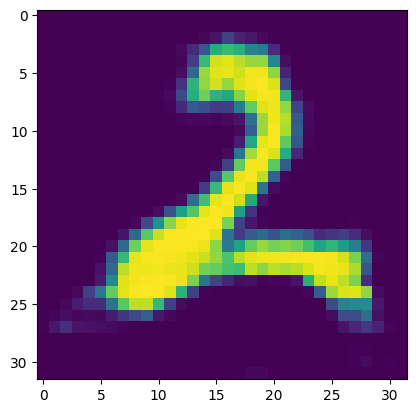

In [16]:
plt.imshow(Fake_MNIST[0][0].reshape(32,32))

In [21]:
in_img = df.corr().round(2).unstack().sort_values(ascending=False)

In [22]:
in_img[in_img < 1]

709  677    0.94
614  582    0.94
646  678    0.94
474  506    0.94
677  709    0.94
            ... 
688  819   -0.47
719  818   -0.47
787  688   -0.47
720  819   -0.48
819  720   -0.48
Length: 1047552, dtype: float64

In [24]:
import seaborn as sns

<Axes: >

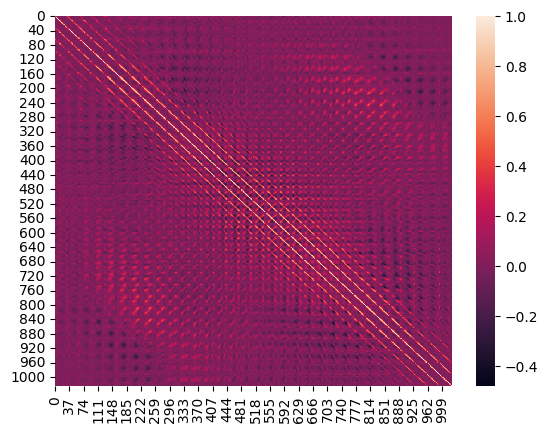

In [26]:
sns.heatmap(df.corr().round(2))

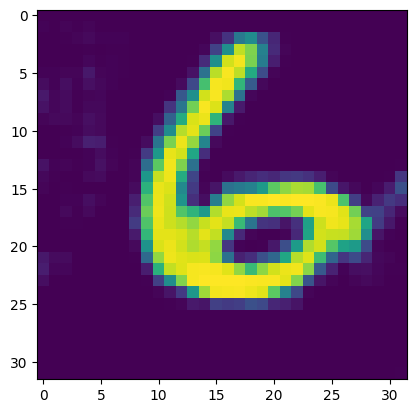

In [8]:
plt.imshow(Fake_MNIST[0][10].reshape(32,32))

In [9]:
# ind_all = np.arange(4000)
# ind_tr = np.random.choice(4000, N1, replace=False)
# ind_te = np.delete(ind_all,ind_tr)
# Fake_MNIST_tr = torch.from_numpy(Fake_MNIST[0][ind_tr])
# Fake_MNIST_te = torch.from_numpy(Fake_MNIST[0][ind_te])

In [27]:
import argparse
import os
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable
import torch.nn as nn
import torch
import pickle

In [28]:
# Configure data loader
os.makedirs("./DK-for-TST/data/mnist", exist_ok=True)
dataloader_FULL = torch.utils.data.DataLoader(
    datasets.MNIST(
        "./DK-for-TST/data/mnist",
        train=True,
        download=True,
        transform=transforms.Compose(
            [transforms.Resize(32), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
        ),
    ),
    batch_size=60000,
    shuffle=True,
)
# Obtain real MNIST images
for i, (imgs, Labels) in enumerate(dataloader_FULL):
    data_all = imgs
    label_all = Labels
dataloader_FULL_te = torch.utils.data.DataLoader(
    datasets.MNIST(
        "./DK-for-TST/data/mnist",
        train=False,
        download=True,
        transform=transforms.Compose(
            [transforms.Resize(32), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
        ),
    ),
    batch_size=10000,
    shuffle=True,
)
for i, (imgs, Labels) in enumerate(dataloader_FULL_te):
    data_all_te = imgs
    label_all_te = Labels

In [87]:
real_list = []
labels = []
for i in range(10000):
    t, l = dataloader_FULL_te.dataset[i]
    real_list.append(np.array(t[0].reshape(32*32)))
    labels.append(l)

In [90]:
real_df = pd.DataFrame(real_list)

In [100]:
real_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.998880,-0.999613,-0.999969,-0.999999,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.039428,0.017785,0.001376,0.000078,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
75%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
max,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.803922,0.145098,-0.921569,-0.992157,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [130]:
fake_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.997014,-0.998927,-0.998829,-0.998883,-0.998326,-0.995890,-0.996643,-0.994833,-0.996515,-0.998469,...,-0.993143,-0.987315,-0.990555,-0.994025,-0.996376,-0.997216,-0.997730,-0.999465,-0.999712,-0.982177
std,0.009507,0.004742,0.004507,0.005142,0.008949,0.018943,0.014030,0.021462,0.015626,0.007453,...,0.043699,0.083057,0.064083,0.044608,0.031719,0.023372,0.020007,0.005553,0.002374,0.031838
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999993
25%,-0.999999,-1.000000,-1.000000,-1.000000,-1.000000,-0.999999,-0.999998,-0.999996,-0.999995,-0.999996,...,-0.999997,-0.999998,-0.999999,-0.999999,-0.999999,-0.999999,-0.999999,-0.999999,-0.999997,-0.997726
50%,-0.999978,-1.000000,-0.999999,-0.999997,-0.999990,-0.999964,-0.999947,-0.999921,-0.999917,-0.999946,...,-0.999960,-0.999969,-0.999978,-0.999978,-0.999982,-0.999978,-0.999985,-0.999993,-0.999985,-0.992908
75%,-0.998991,-0.999956,-0.999905,-0.999797,-0.999688,-0.999209,-0.999186,-0.998720,-0.998969,-0.999509,...,-0.999486,-0.999472,-0.999585,-0.999650,-0.999718,-0.999692,-0.999781,-0.999932,-0.999918,-0.980099
max,-0.777169,-0.893969,-0.923162,-0.799416,-0.670059,-0.519979,-0.522574,-0.503956,-0.553487,-0.827810,...,0.031640,0.572610,0.441620,0.259027,0.443376,-0.034209,-0.151669,-0.717535,-0.855124,-0.163544


In [104]:
real_df.to_csv('real_df.csv', index=False)

In [111]:
real_df = pd.read_csv('real_df.csv')
fake_df = pd.read_csv('fake_df.csv')

In [120]:
real_df['label'] = labels

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9996,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9997,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9998,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [108]:
import matplotlib.pyplot as plt

In [117]:
## 데이터 확인 잘됨

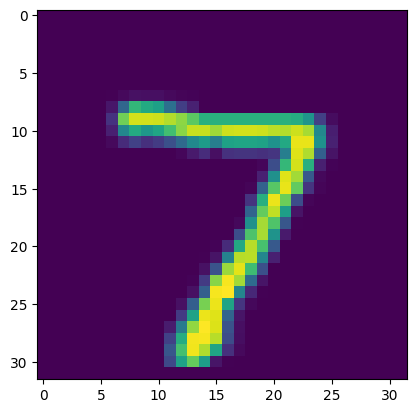

In [116]:
plt.imshow(np.array(real_df.iloc[0]).reshape(32,32))

In [123]:
import collections

In [125]:
collections.Counter(labels)

Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

In [128]:
import numpy as np

pos = np.where(np.array(labels) == 1)[0]

print(pos)

[   2    5   14 ... 9978 9984 9994]


In [129]:
from sklearn.manifold import TSNE

In [135]:
real_df

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
9996,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3
9997,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4
9998,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5


In [136]:
# 2차원으로 차원 축소
n_components = 2

# t-sne 모델 생성
model = TSNE(n_components=n_components)

# 학습한 결과 2차원 공간 값 출력
print(model.fit_transform(real_df))
# [
#     [67.38322, -1.9517338],
#     [-11.936052, -8.906425],
#     ...
#     [-10.278599, 8.832907],
#     [25.714725, 11.745557],
# ]

[[-58.596657   -1.5464432]
 [-10.881153  -54.760757 ]
 [-34.53493   -43.025158 ]
 ...
 [  5.3858814  52.231033 ]
 [ 19.224272   32.97565  ]
 [ 64.0276     29.337362 ]]


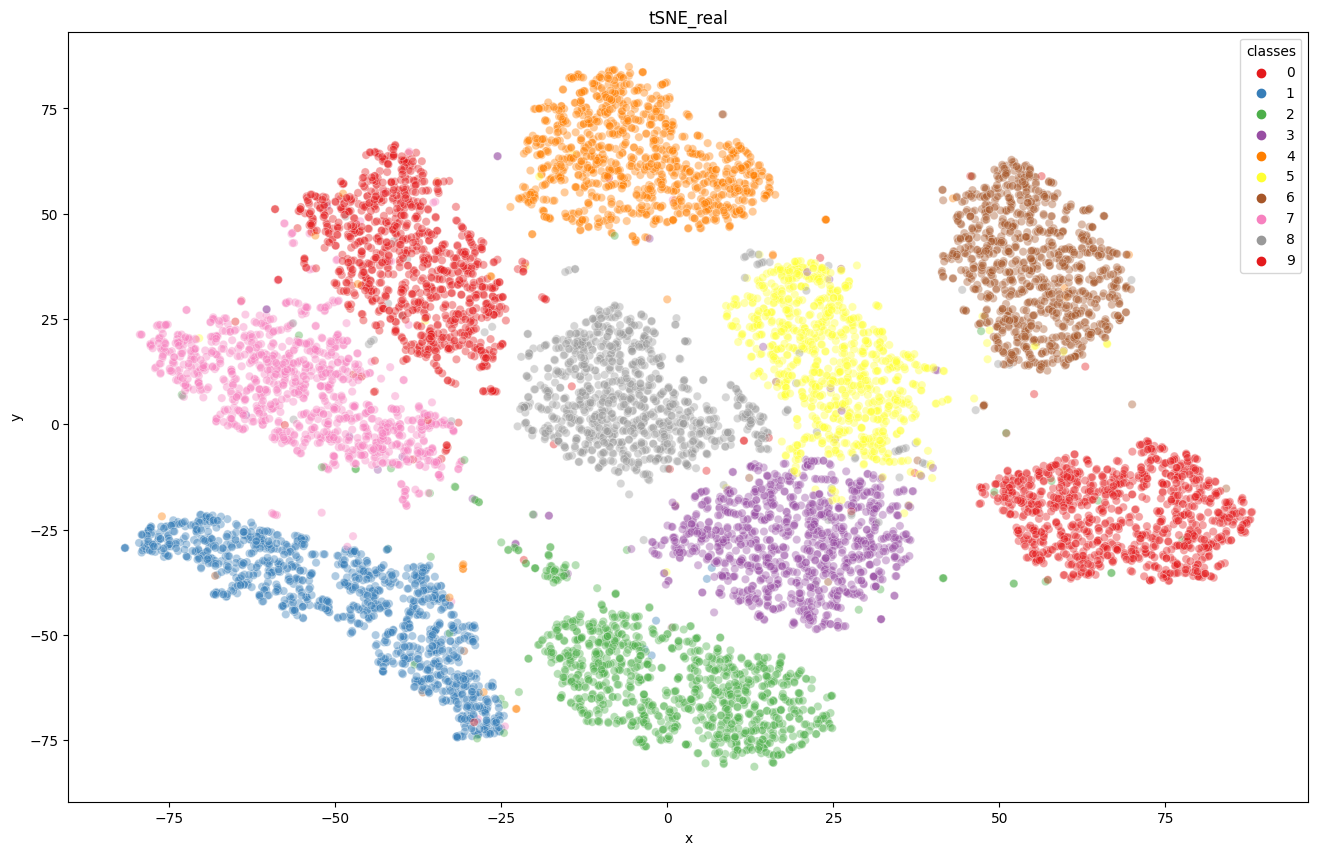

In [147]:
tsne_real = model.fit_transform(real_df)
tsne_real_df = pd.DataFrame({'x': tsne_real[:, 0], 'y':tsne_real[:, 1], 'classes': labels})

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x = 'x', y = 'y',
    hue = 'classes',
    palette = sns.color_palette("Set1", 10),
    data = tsne_real_df,
    legend = "full",
    alpha = 0.4
)

plt.title("tSNE_real")

plt.savefig('TSNE_real.png', bbox_inches='tight')  
plt.show()

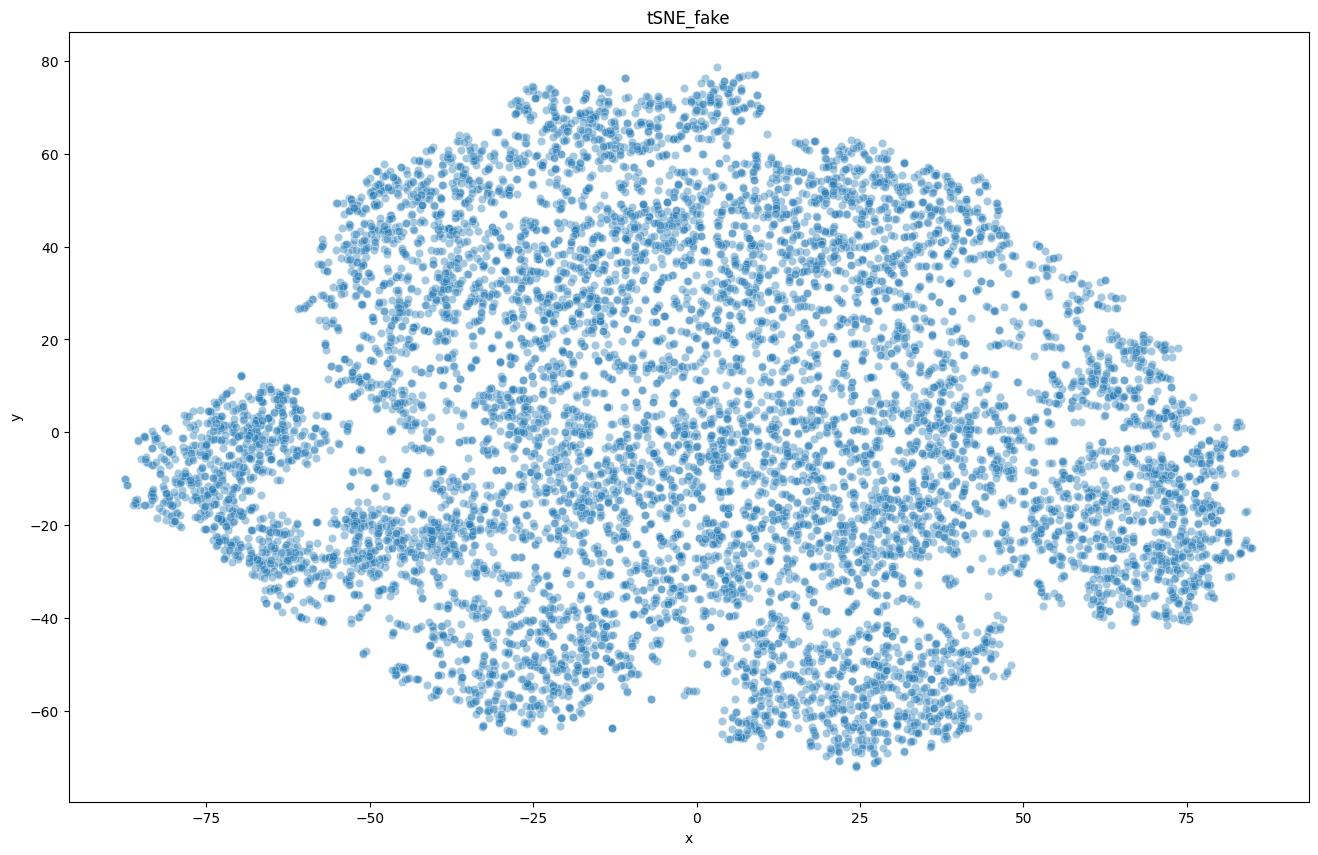

In [146]:
tsne_fake = model.fit_transform(fake_df)
tsne_fake_df = pd.DataFrame({'x': tsne_fake[:, 0], 'y':tsne_fake[:, 1]})

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x = 'x', y = 'y',
    #hue = 'classes',
    #palette = sns.color_palette("Set1", 10),
    data = tsne_fake_df,
    legend = "full",
    alpha = 0.4
)

plt.title("tSNE_fake")

plt.savefig('TSNE_fake.png', bbox_inches='tight')  
plt.show()

In [ ]:
# for i in range(10000):
#     dataloader_FULL_te.dataset[i][1]

In [181]:
device = torch.device('cpu')

print('Current cuda device is', device)

Current cuda device is cpu


In [150]:
fake_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.999973,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999999,-0.999996,...,-0.999921,-0.999985,-0.999973,-0.999869,-0.998887,-0.997077,-0.994639,-0.999252,-0.999712,-0.999576
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999999,-0.999984,-0.999733,-0.999252,-0.999773,...,-0.999894,-0.999977,-0.999994,-0.999984,-0.999753,-0.998708,-0.999171,-0.999856,-0.999938,-0.993231
2,-0.996899,-0.996691,-0.995577,-0.997534,-0.998864,-0.999402,-0.999528,-0.998523,-0.996875,-0.996668,...,-0.999928,-0.999977,-0.999965,-0.999945,-0.999820,-0.999720,-0.999847,-0.999980,-0.999978,-0.972436
3,-0.999999,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999999,-0.999997,...,-0.999858,-0.999987,-0.999997,-1.000000,-1.000000,-1.000000,-0.999998,-0.999994,-0.999926,-0.970809
4,-0.999996,-1.000000,-1.000000,-0.999998,-0.999999,-0.999998,-0.999996,-0.999983,-0.999961,-0.999942,...,-0.999969,-0.999993,-1.000000,-1.000000,-1.000000,-0.999999,-0.999995,-0.999992,-0.999979,-0.994897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.999994,-1.000000,-1.000000,-0.999990,-0.999971,-0.999986,-0.999996,-1.000000,-1.000000,-0.999994,...,-0.999775,-0.998033,-0.995035,-0.996604,-0.999951,-0.999994,-0.999999,-0.999999,-0.999997,-0.997722
9996,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999964,-0.999669,-0.998930,-0.999172,-0.999754,...,-0.980387,-0.997080,-0.999925,-0.999996,-0.999998,-0.999970,-0.999800,-0.999768,-0.999740,-0.997466
9997,-0.999839,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999980,-0.999616,-0.999670,-0.998802,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.983989
9998,-0.987417,-0.984159,-0.998641,-0.999963,-0.999983,-0.999994,-0.999931,-0.999625,-0.999655,-0.999953,...,-0.999787,-0.999808,-0.999830,-0.999931,-0.999994,-1.000000,-1.000000,-1.000000,-1.000000,-0.997360


/opt/homebrew/Caskroom/miniforge/base/envs/DL-torch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


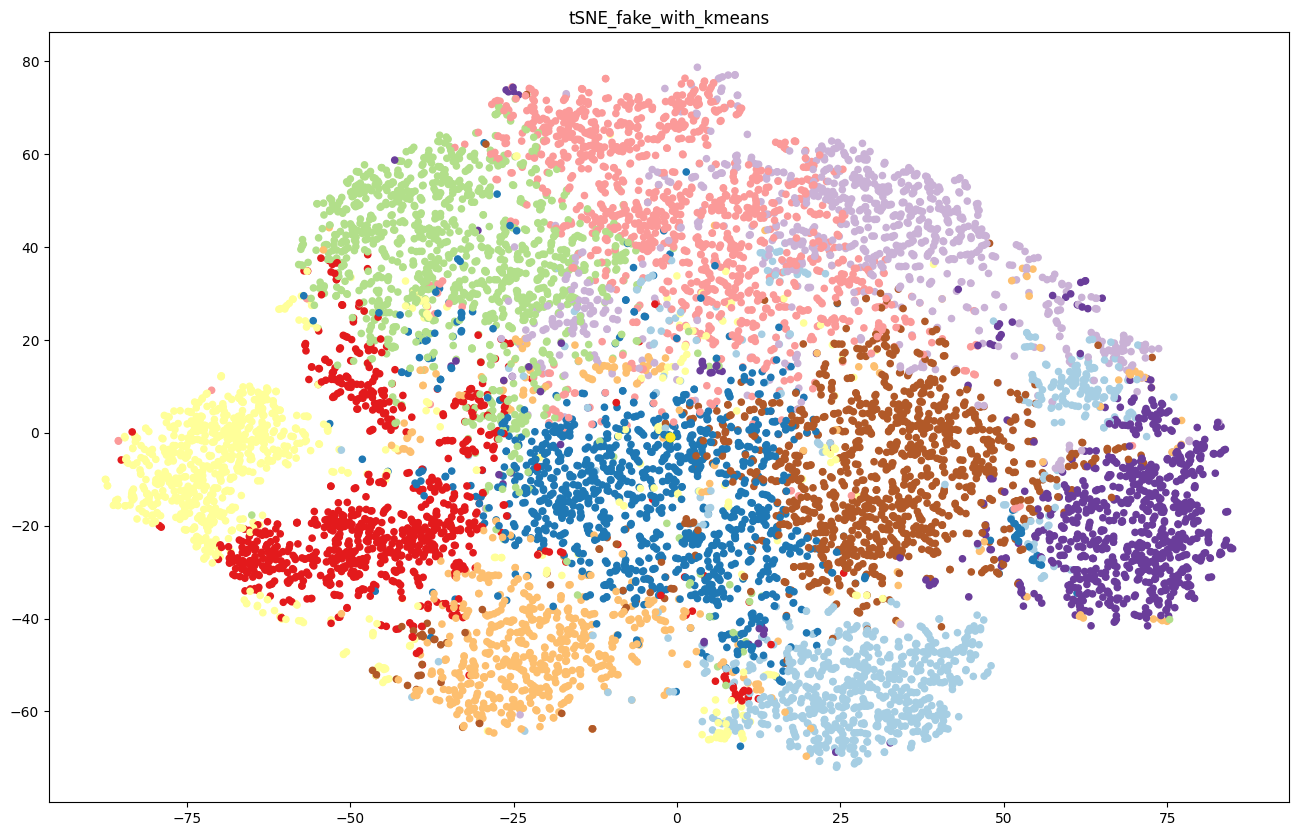

In [162]:
#K-Means
from sklearn.cluster import KMeans

#Define function:
kmeans = KMeans(n_clusters=10)

#Fit the model:
km = kmeans.fit(fake_df)
km_labels = km.labels_

#Print results:
#print(kmeans.labels_)

#Visualise results:
plt.figure(figsize=(16, 10))
plt.scatter(tsne_fake[:, 0], tsne_fake[:, 1], 
            c=kmeans.labels_,      
            s=20, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], linewidth=1, 
            c=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.title("tSNE_fake_with_kmeans")

plt.savefig('TSNE_fake_kmeans.png', bbox_inches='tight')  
plt.show()

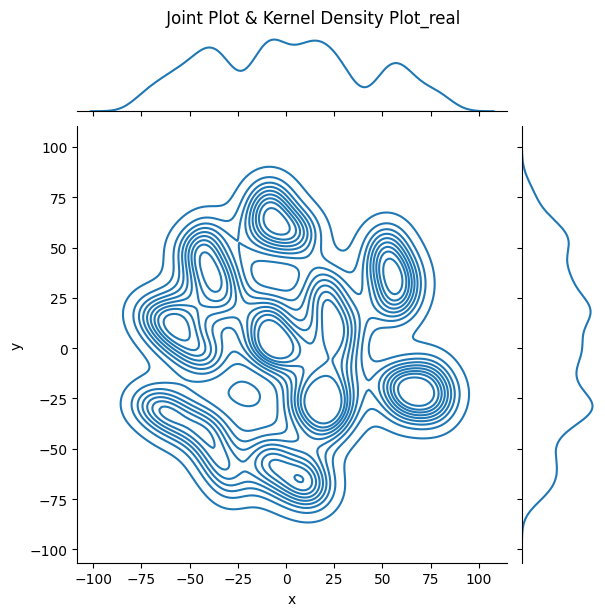

In [181]:
sns.jointplot(x="x", y="y", data=tsne_real_df, kind="kde")
plt.suptitle(" Joint Plot & Kernel Density Plot_real", y=1.02)

plt.savefig('TSNE_real_density_kde.png', bbox_inches='tight')  
plt.show()

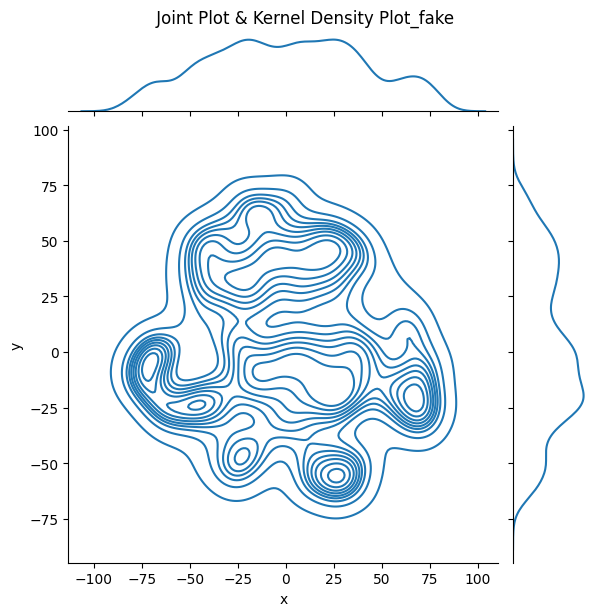

In [182]:
sns.jointplot(x="x", y="y", data=tsne_fake_df, kind="kde")
plt.suptitle(" Joint Plot & Kernel Density Plot_fake", y=1.02)

plt.savefig('TSNE_fake_density.png', bbox_inches='tight')  
plt.show()

plt.show()

In [164]:
fake_df['label'] = kmeans.labels_

In [176]:
kmeans.labels_

array([5, 4, 3, ..., 8, 9, 1], dtype=int32)

In [165]:
fake_df.iloc

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,-0.999973,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999999,-0.999996,...,-0.999985,-0.999973,-0.999869,-0.998887,-0.997077,-0.994639,-0.999252,-0.999712,-0.999576,5
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999999,-0.999984,-0.999733,-0.999252,-0.999773,...,-0.999977,-0.999994,-0.999984,-0.999753,-0.998708,-0.999171,-0.999856,-0.999938,-0.993231,4
2,-0.996899,-0.996691,-0.995577,-0.997534,-0.998864,-0.999402,-0.999528,-0.998523,-0.996875,-0.996668,...,-0.999977,-0.999965,-0.999945,-0.999820,-0.999720,-0.999847,-0.999980,-0.999978,-0.972436,3
3,-0.999999,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999999,-0.999997,...,-0.999987,-0.999997,-1.000000,-1.000000,-1.000000,-0.999998,-0.999994,-0.999926,-0.970809,3
4,-0.999996,-1.000000,-1.000000,-0.999998,-0.999999,-0.999998,-0.999996,-0.999983,-0.999961,-0.999942,...,-0.999993,-1.000000,-1.000000,-1.000000,-0.999999,-0.999995,-0.999992,-0.999979,-0.994897,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.999994,-1.000000,-1.000000,-0.999990,-0.999971,-0.999986,-0.999996,-1.000000,-1.000000,-0.999994,...,-0.998033,-0.995035,-0.996604,-0.999951,-0.999994,-0.999999,-0.999999,-0.999997,-0.997722,9
9996,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999964,-0.999669,-0.998930,-0.999172,-0.999754,...,-0.997080,-0.999925,-0.999996,-0.999998,-0.999970,-0.999800,-0.999768,-0.999740,-0.997466,4
9997,-0.999839,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999980,-0.999616,-0.999670,-0.998802,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.983989,8
9998,-0.987417,-0.984159,-0.998641,-0.999963,-0.999983,-0.999994,-0.999931,-0.999625,-0.999655,-0.999953,...,-0.999808,-0.999830,-0.999931,-0.999994,-1.000000,-1.000000,-1.000000,-1.000000,-0.997360,9


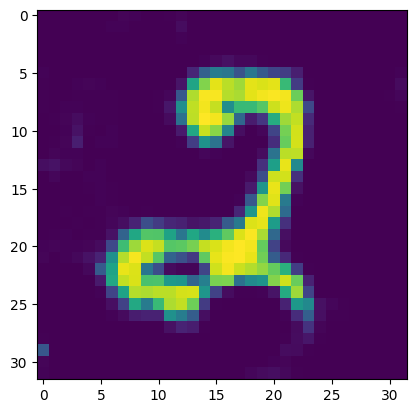

In [173]:
plt.imshow(np.array(fake_df.drop('label',axis=1).iloc[20]).reshape(32,32))

In [183]:
import random

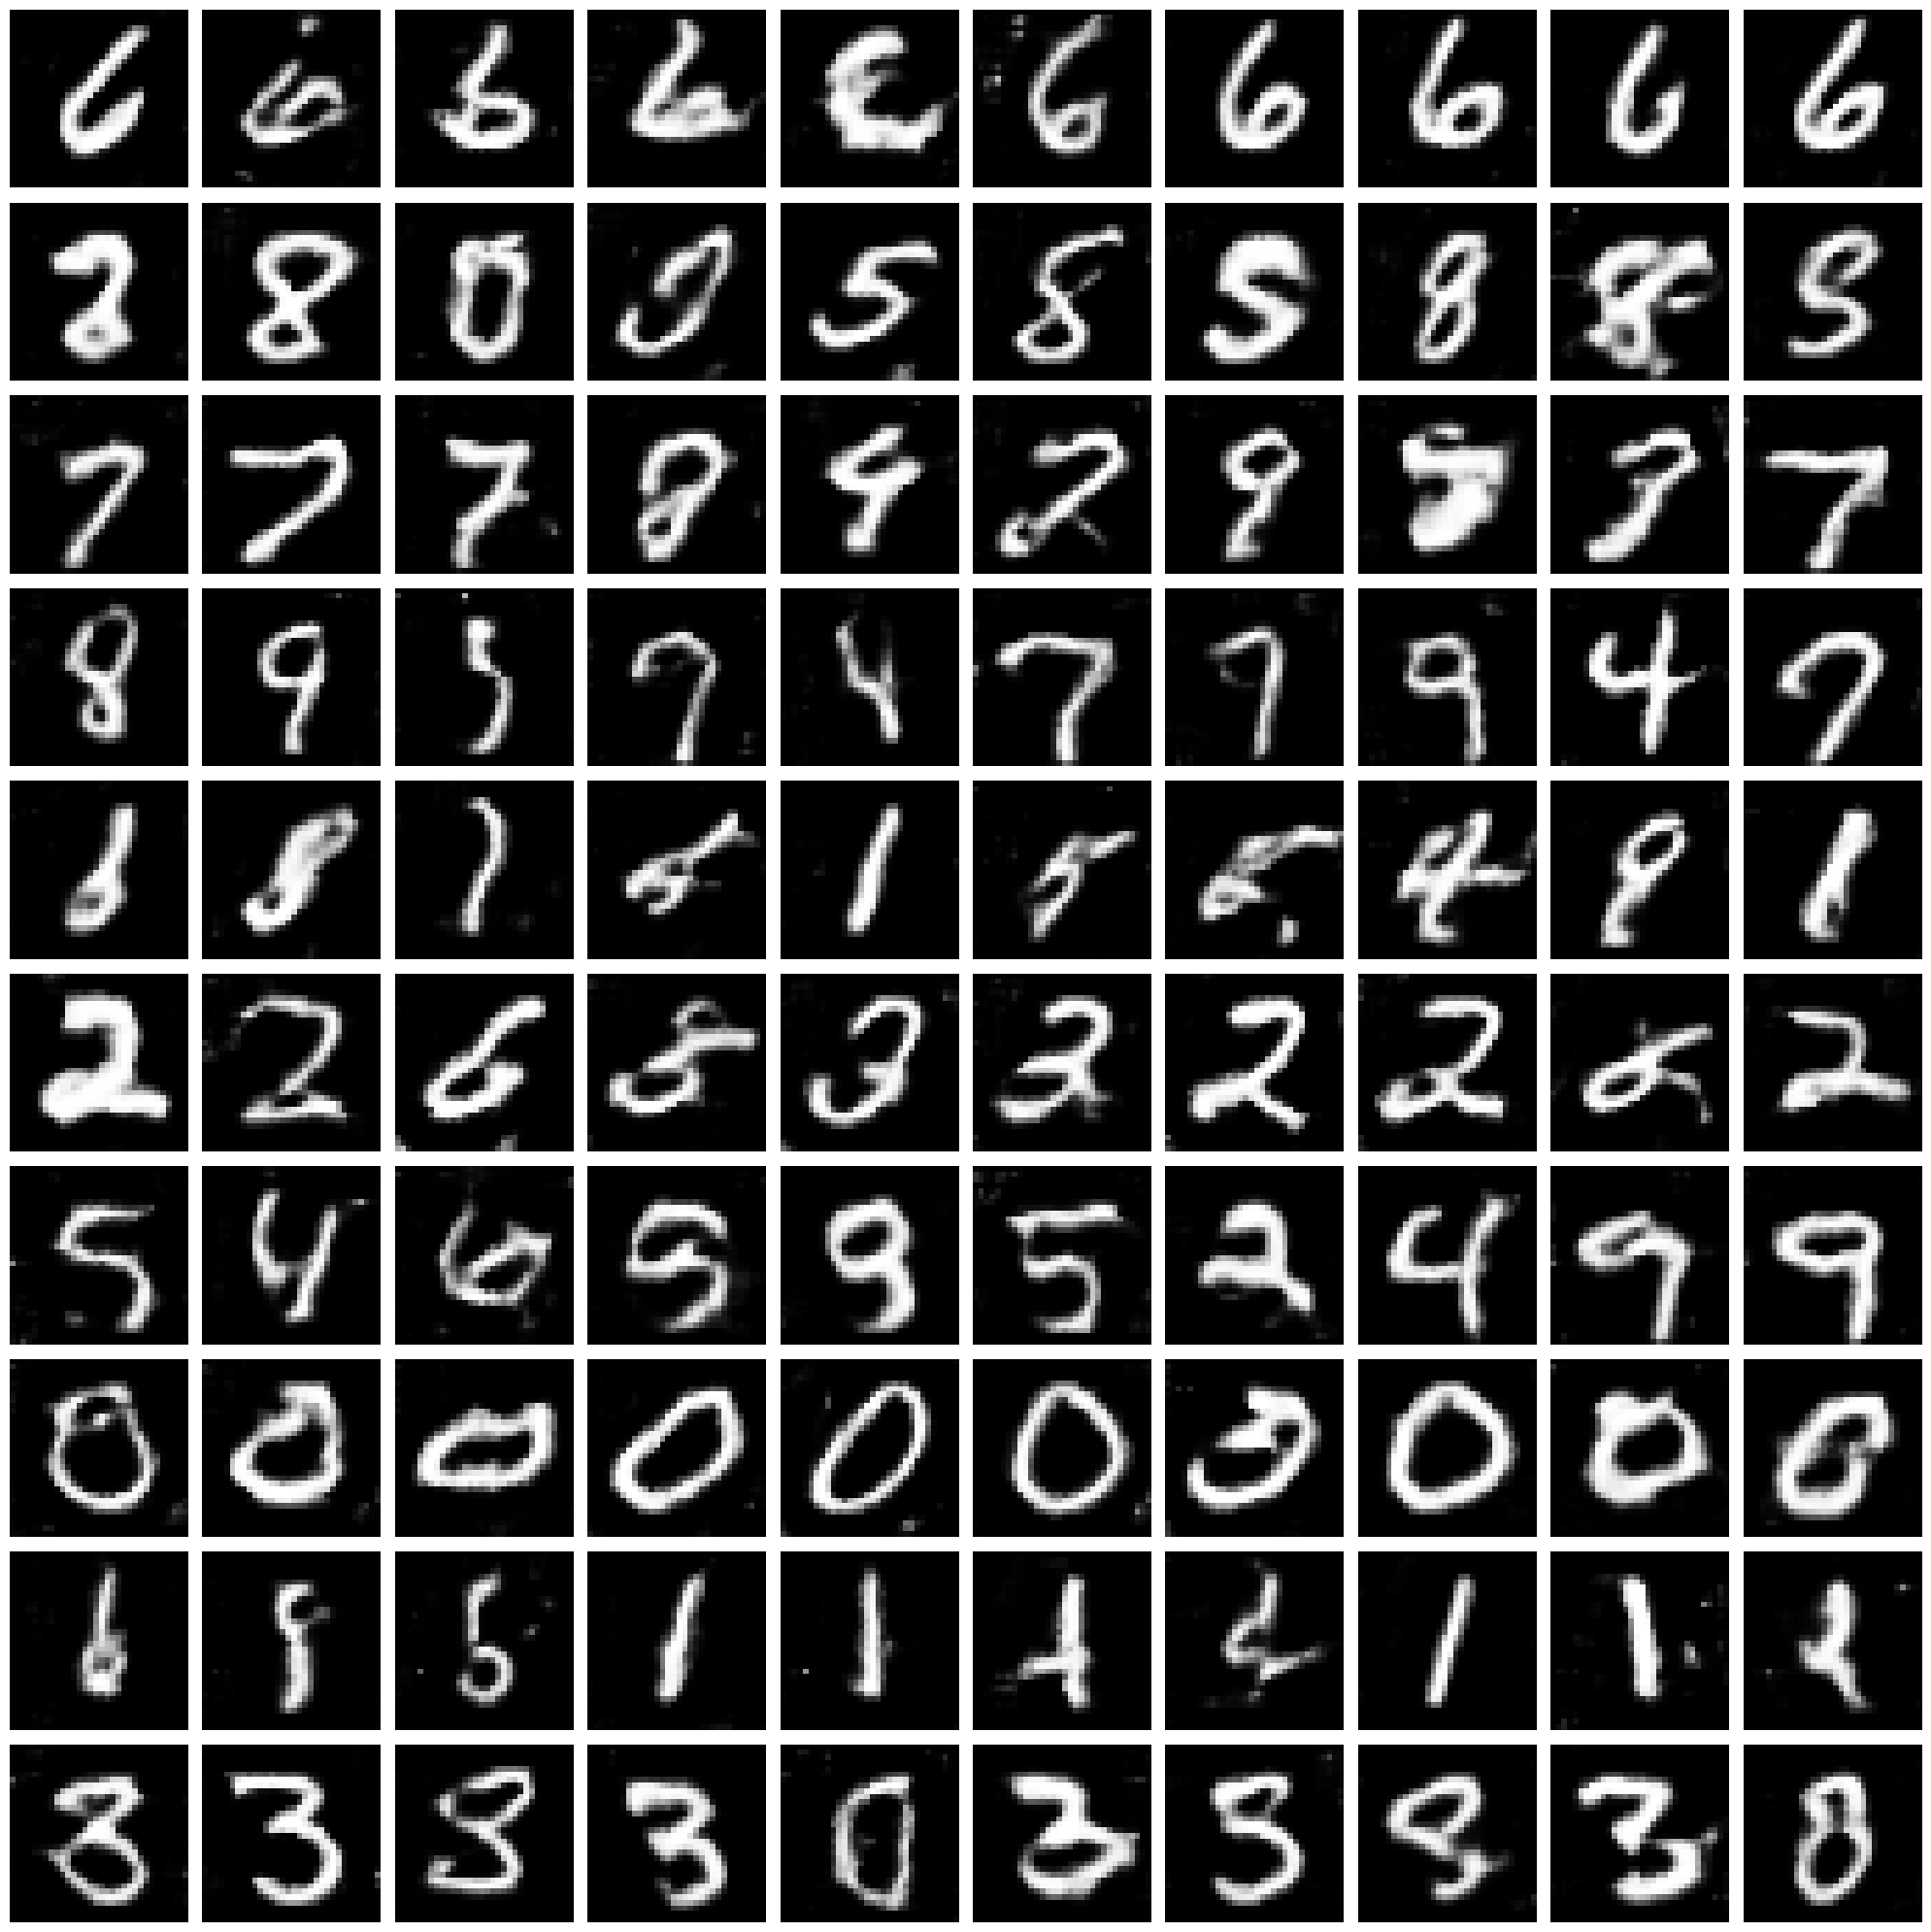

In [200]:
plt.figure(figsize=(20,20))

for n in range(10):
    tmp = fake_df[fake_df.label == n]
    tmp_list = random.sample(tmp.index.tolist(), 10)
    sample = tmp.loc[tmp_list].drop('label',axis=1)
    
    for i in range(10):
        plt.subplot(10, 10, n*10 + i+1)
        plt.imshow(np.array(sample.iloc[i]).reshape(32,32), cmap='gray')
        #plt.title(f'label : {n}')
        plt.axis('off')
    
plt.tight_layout()
plt.show()

In [207]:
fake_df.label = fake_df.label.replace(kv)

In [208]:
fake_df.label.value_counts()

label
4    1292
3    1192
8    1185
7    1169
6     942
5     905
9     887
1     883
0     834
2     711
Name: count, dtype: int64

In [204]:
kv = {k: v for k, v in enumerate([6,8,7,4,5,2,9,0,1,3])}

In [210]:
fake_df.drop('label',axis=1)

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,-0.999973,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999999,-0.999996,...,-0.999985,-0.999973,-0.999869,-0.998887,-0.997077,-0.994639,-0.999252,-0.999712,-0.999576,2
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999999,-0.999984,-0.999733,-0.999252,-0.999773,...,-0.999977,-0.999994,-0.999984,-0.999753,-0.998708,-0.999171,-0.999856,-0.999938,-0.993231,5
2,-0.996899,-0.996691,-0.995577,-0.997534,-0.998864,-0.999402,-0.999528,-0.998523,-0.996875,-0.996668,...,-0.999977,-0.999965,-0.999945,-0.999820,-0.999720,-0.999847,-0.999980,-0.999978,-0.972436,4
3,-0.999999,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999999,-0.999997,...,-0.999987,-0.999997,-1.000000,-1.000000,-1.000000,-0.999998,-0.999994,-0.999926,-0.970809,4
4,-0.999996,-1.000000,-1.000000,-0.999998,-0.999999,-0.999998,-0.999996,-0.999983,-0.999961,-0.999942,...,-0.999993,-1.000000,-1.000000,-1.000000,-0.999999,-0.999995,-0.999992,-0.999979,-0.994897,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.999994,-1.000000,-1.000000,-0.999990,-0.999971,-0.999986,-0.999996,-1.000000,-1.000000,-0.999994,...,-0.998033,-0.995035,-0.996604,-0.999951,-0.999994,-0.999999,-0.999999,-0.999997,-0.997722,3
9996,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999964,-0.999669,-0.998930,-0.999172,-0.999754,...,-0.997080,-0.999925,-0.999996,-0.999998,-0.999970,-0.999800,-0.999768,-0.999740,-0.997466,5
9997,-0.999839,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999980,-0.999616,-0.999670,-0.998802,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.983989,1
9998,-0.987417,-0.984159,-0.998641,-0.999963,-0.999983,-0.999994,-0.999931,-0.999625,-0.999655,-0.999953,...,-0.999808,-0.999830,-0.999931,-0.999994,-1.000000,-1.000000,-1.000000,-1.000000,-0.997360,3


In [211]:
# #K-Means
# from sklearn.cluster import KMeans

# #Define function:
# kmeans = KMeans(n_clusters=10)

# #Fit the model:
# km = kmeans.fit(fake_df.drop('label',axis=1))
# km_labels = km.labels_

# #Print results:
# #print(kmeans.labels_)

# #Visualise results:
# plt.figure(figsize=(16, 10))
# plt.scatter(tsne_fake[:, 0], tsne_fake[:, 1], 
#             c=kmeans.labels_,      
#             s=20, cmap='Paired')
# plt.scatter(kmeans.cluster_centers_[:, 0],
#             kmeans.cluster_centers_[:, 1], linewidth=1, 
#             c=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# plt.title("tSNE_fake_with_kmeans")

# plt.savefig('TSNE_fake_kmeans.png', bbox_inches='tight')  
# plt.show()

In [222]:
real_array = np.array(real_df.drop('label',axis=1)).reshape(-1)

In [223]:
fake_array = np.array(fake_df.drop('label',axis=1)).reshape(-1)

In [228]:
from sklearn import preprocessing

In [230]:
min_max_scaler = preprocessing.MinMaxScaler()
real_minmax = min_max_scaler.fit_transform(real_array.reshape(-1, 1))
real_minmax

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [231]:
fake_minmax = min_max_scaler.fit_transform(fake_array.reshape(-1, 1))
fake_minmax

array([[1.36494982e-05],
       [8.94071938e-08],
       [0.00000000e+00],
       ...,
       [9.76624579e-05],
       [8.68441874e-05],
       [1.62242466e-02]])

In [225]:
real_array.min(), real_array.max()

(-1.0, 1.0)

In [226]:
fake_array.min(), fake_array.max()

(-1.0, 0.999994933605194)

In [232]:
fake_minmax.min(), fake_minmax.max()

(0.0, 1.0)

In [235]:
fake_minmax.reshape(-1).tolist()

[1.3649498230516866e-05,
 8.940719375960526e-08,
 0.0,
 0.0,
 0.0,
 2.980239788286099e-08,
 1.4901198952532724e-07,
 2.384191830628879e-07,
 4.172335703600538e-07,
 2.205377443331713e-06,
 3.993521316358883e-06,
 3.5464853481159686e-06,
 4.619371671898964e-06,
 4.619371671898964e-06,
 1.0639456044236884e-05,
 3.209718252011884e-05,
 0.0001321140298154999,
 0.00024977389665781224,
 0.00044834727375264727,
 0.00022172984024987352,
 6.511823937449535e-05,
 1.2517007110801615e-05,
 1.4007127004944664e-06,
 1.7881438740818822e-07,
 2.086167851800269e-07,
 5.96047957768242e-07,
 1.7881438740818822e-07,
 1.1920959164246625e-07,
 2.980239788286099e-08,
 0.0,
 0.0,
 7.480401868653619e-06,
 0.001525018502073705,
 7.450599470715247e-07,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.940719375960526e-08,
 2.086167851800269e-07,
 9.238743343686906e-07,
 3.904114122654789e-06,
 2.375251111280674e-05,
 0.00026354260447980504,
 0.0011881619988014513,
 0.001353893133429207,
 0.0014546252382738878,


In [239]:
import scipy as sp
import scipy.stats

In [240]:
x1 = fake_minmax.reshape(-1).tolist()
x2 = real_minmax.reshape(-1).tolist()

In [255]:
len(x1)

10240000

AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

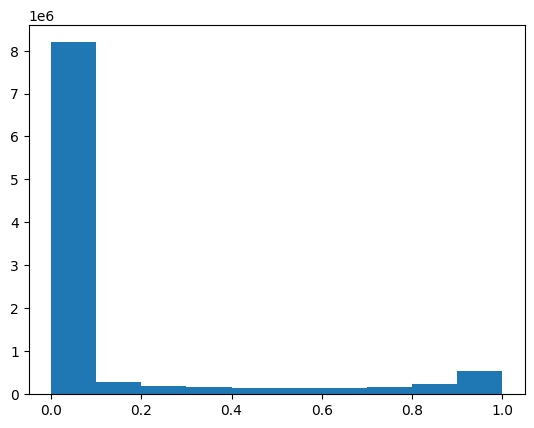

In [258]:
pd.DataFrame(x1).hist(kde=True)
pd.DataFrame(x2).hist()
plt.show()

In [256]:
len(x2)

10240000

/var/folders/1b/dx8_94fs0q740wx3lfknk6y40000gn/T/ipykernel_3119/3558102711.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="fake_data")
/var/folders/1b/dx8_94fs0q740wx3lfknk6y40000gn/T/ipykernel_3119/3558102711.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


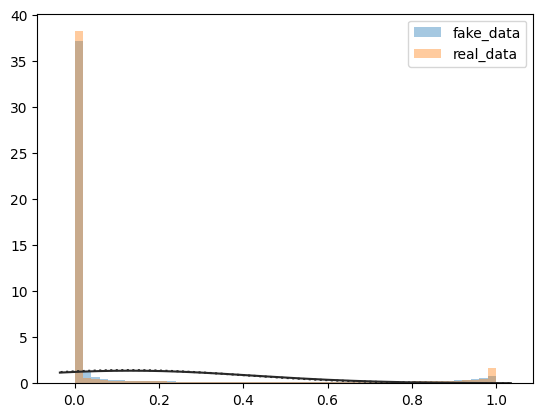

In [245]:

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="fake_data")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="real_data")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [260]:
x2

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [261]:
import pandas as pd
from scipy.stats import mannwhitneyu

print(mannwhitneyu(x1, x2))

MannwhitneyuResult(statistic=73838101107329.0, pvalue=0.0)


In [262]:
import scipy.stats as stats

stats.kstest(x1, x2)

KstestResult(statistic=0.5505930664062499, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

In [236]:
from scipy.stats import chi2_contingency
 

 
chi2, p, dof, expected = chi2_contingency([row1, row2], correction=False)
msg = 'Statistic: {}\np value: {}\ndof: {}'
print(msg.format(chi2, p, dof))
print(expected)

ValueError: The internally computed table of expected frequencies has a zero element at (0, 2).

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

x = [12, 11, 13, 14, 15]
y = [16, 15, 17, 19, 20]

print(mannwhitneyu(x, y))